In [99]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [100]:
model_data = pd.read_csv('ModelReadyZillow.csv')

In [101]:
X = model_data.drop(['logerror', 'parcelid', 'month', 'year','propertycountylandusecode','propertyzoningdesc'], axis=1)
y = model_data['logerror']

#### Train Test Split

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# Random Forest

In [103]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(max_depth = 2)

In [104]:
rfreg.fit(X_train, y_train)
prediction = rfreg.predict(X_test)

In [105]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, prediction)

0.06779466040328526

In [129]:
from sklearn.model_selection import GridSearchCV

parameters = {
                'n_estimators': [10, 100],
                'min_samples_leaf': [1, 5],
                'max_depth': [2, 5],
                'n_jobs': [-1],
             }

grid_obj = GridSearchCV(rfreg, parameters, cv=5, scoring='neg_mean_absolute_error')
grid_obj.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100], 'min_samples_leaf': [1, 5], 'max_depth': [2, 5], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [130]:
grid_obj.best_score_

-0.06878554104486269

In [131]:
grid_obj.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 100, 'n_jobs': -1}

## Gradient Boost

In [111]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,'learning_rate': 0.01, 'loss': 'ls'}
gbreg = GradientBoostingRegressor(**params)

In [112]:
gbreg.fit(X_train, y_train)
gb_predict = gbreg.predict(X_test)

In [113]:
mean_absolute_error(y_test, gb_predict)

0.06762343204636435

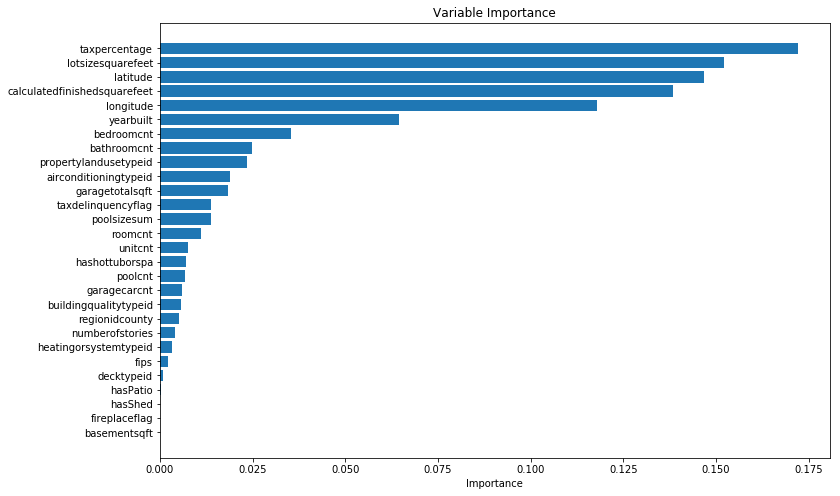

In [114]:
feature_importance_gb = gbreg.feature_importances_
sorted_idx = np.argsort(feature_importance_gb)

pos= np.arange(sorted_idx.shape[0]) +0.5

plt.figure(figsize=(12,8))
plt.barh(pos,feature_importance_gb[sorted_idx], align='center')
plt.yticks(pos,X.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('Variable Importance')
plt.show()


In [132]:
param_grid={'n_estimators':[100],
            'learning_rate': [0.1, 0.05],# 0.05, 0.02, 0.01], 
            'max_depth':[6,4],#4,6], 
            'min_samples_leaf':[3,5],#,5,9,17], 
            'max_features':[1.0, 0.1],#,0.3]#,0.1] 
           } 
gb_obj = GridSearchCV(gbreg, param_grid, cv=5, scoring='neg_mean_absolute_error')
gb_obj.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100], 'learning_rate': [0.1, 0.05], 'max_depth': [6, 4], 'min_samples_leaf': [3, 5], 'max_features': [1.0, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [133]:
gb_obj.best_score_

-0.06864116462892232

In [134]:
gb_obj.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'max_features': 0.1,
 'min_samples_leaf': 5,
 'n_estimators': 100}